In [2]:
import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import glob
%matplotlib inline


All the plots and tables for the second candidate

/Users/michaelpuig-holzman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


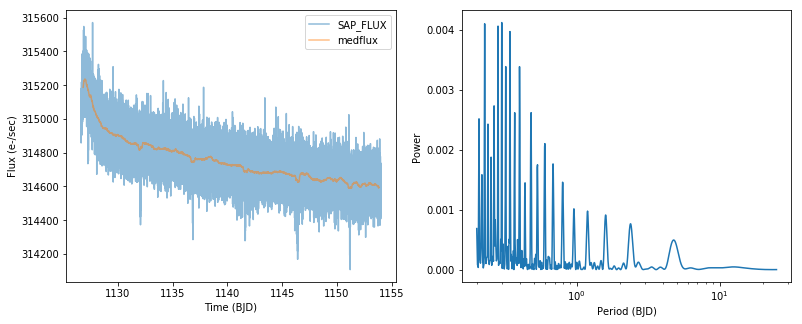

0.2992099209920992


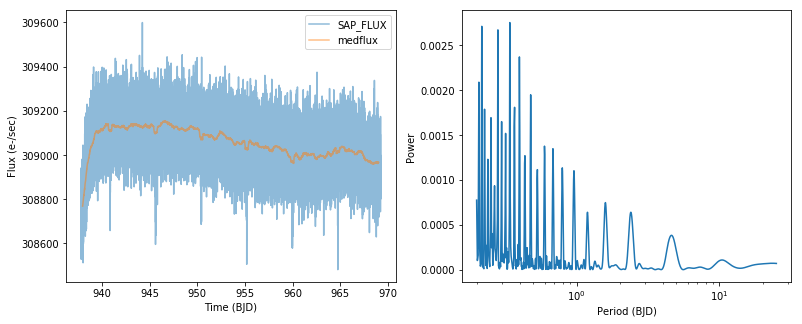

0.3413741374137414


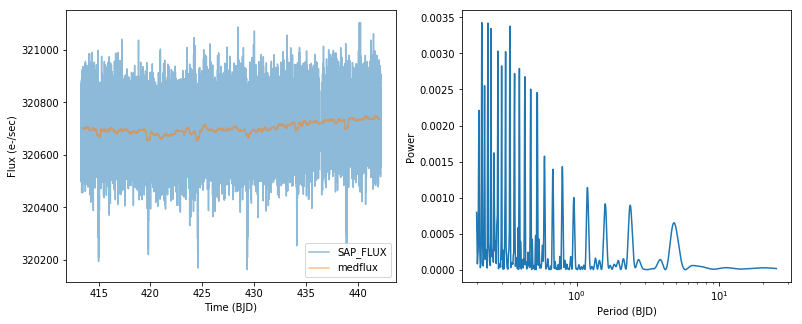

0.21736173617361737


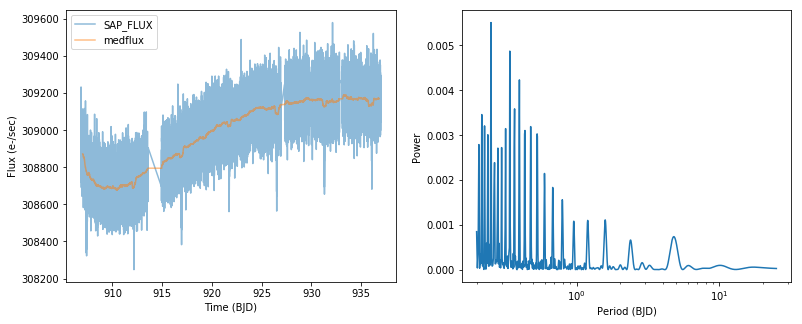

0.2520852085208521


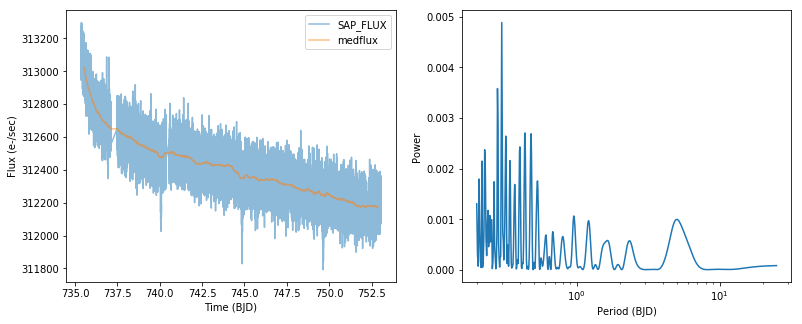

0.2992099209920992


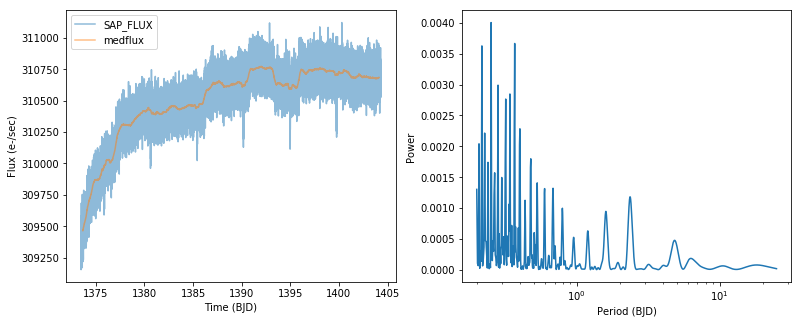

0.2520852085208521


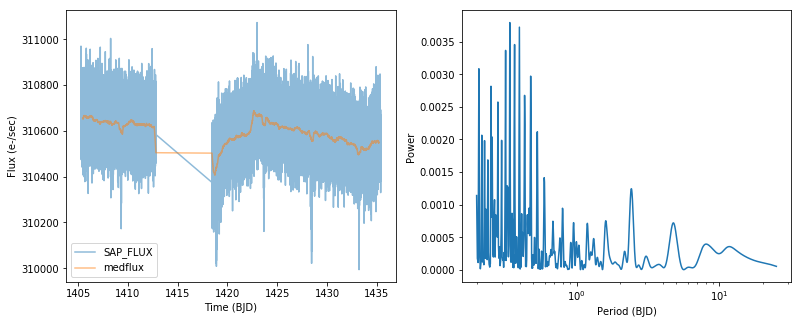

0.3413741374137414


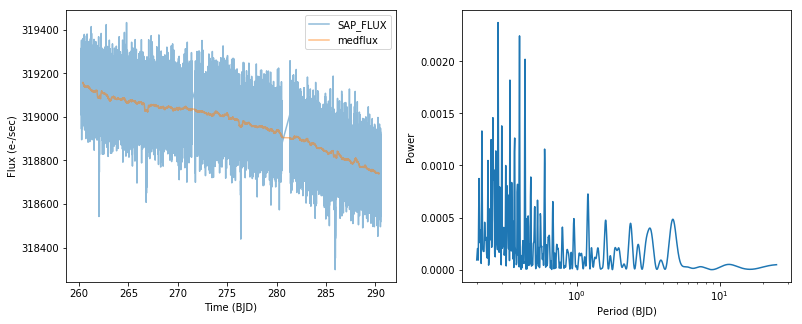

0.28184818481848184


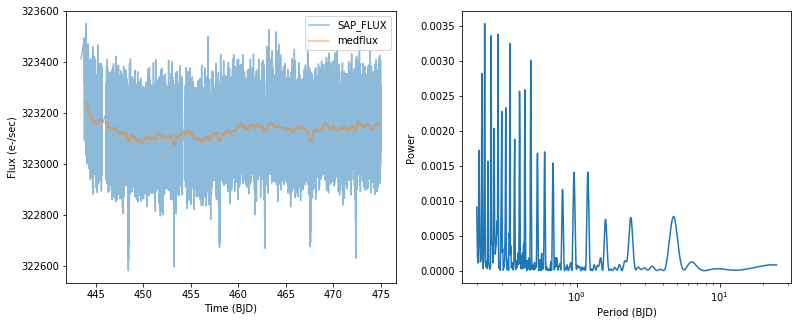

0.2272827282728273


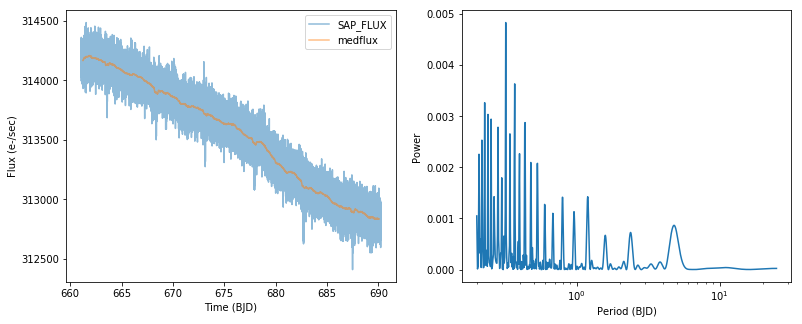

0.31905190519051907


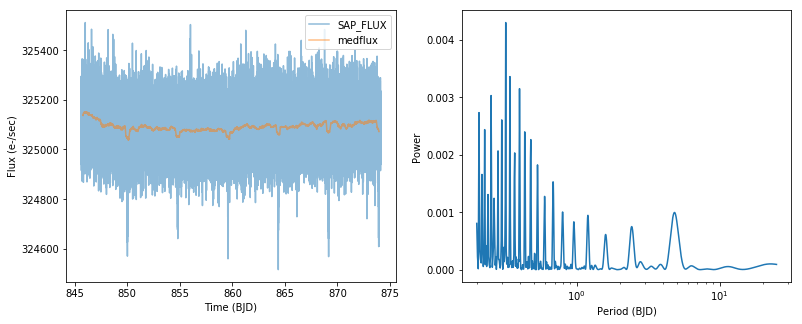

0.31905190519051907


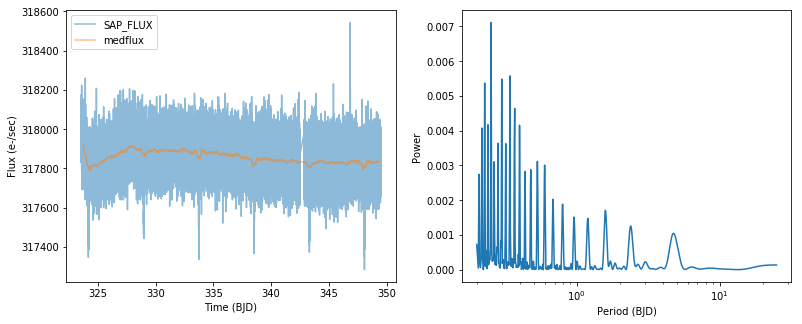

0.2520852085208521


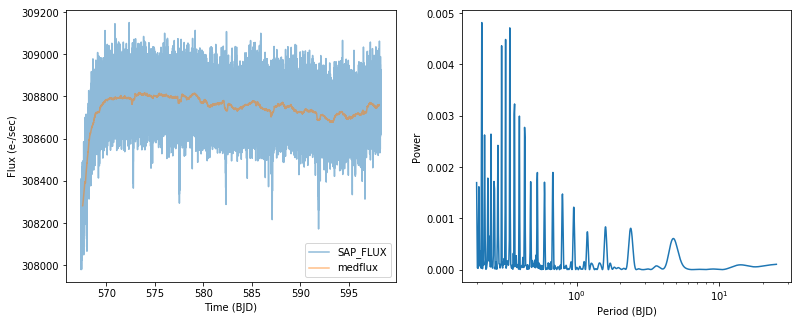

0.21736173617361737


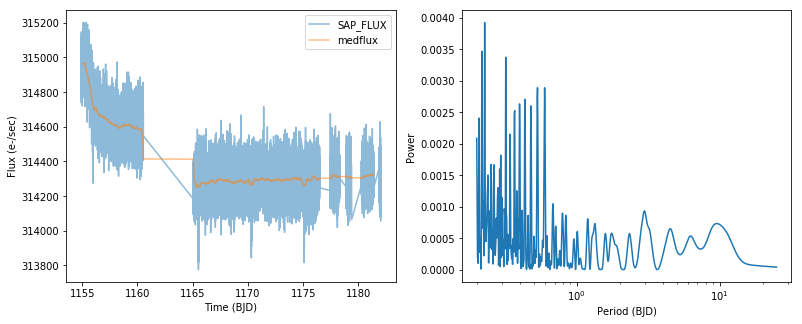

0.2272827282728273


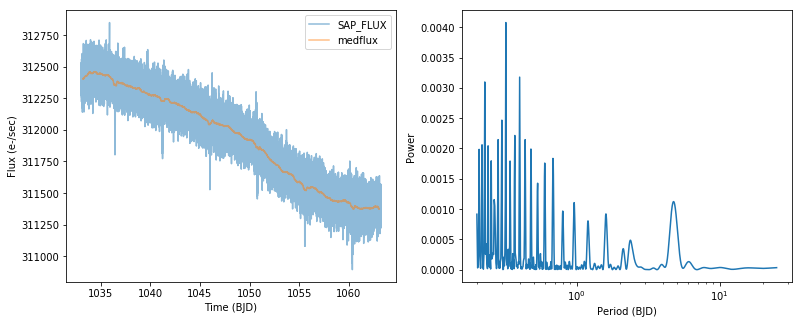

0.31905190519051907


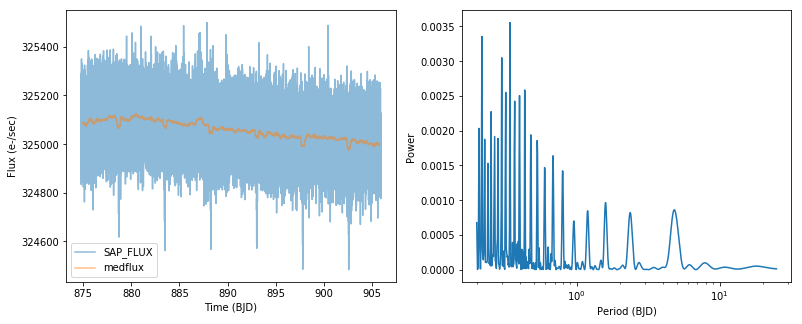

0.3413741374137414


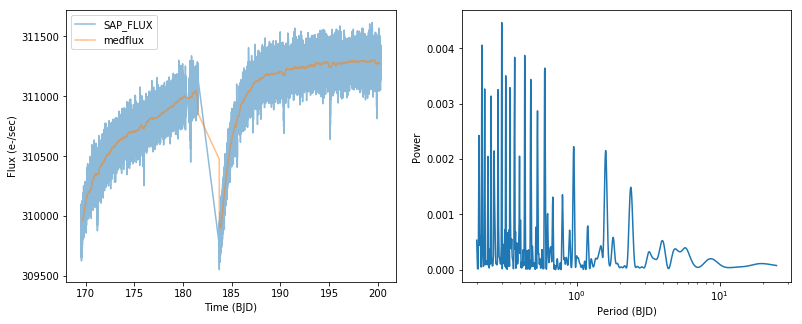

0.2992099209920992


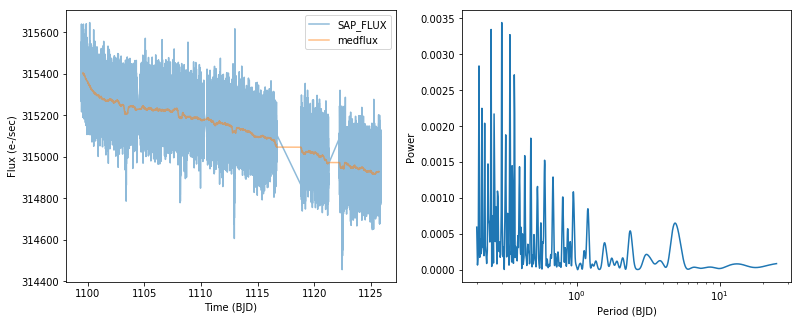

0.2992099209920992


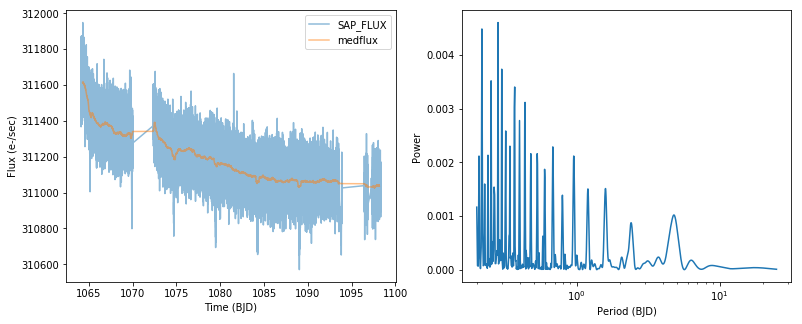

0.28184818481848184


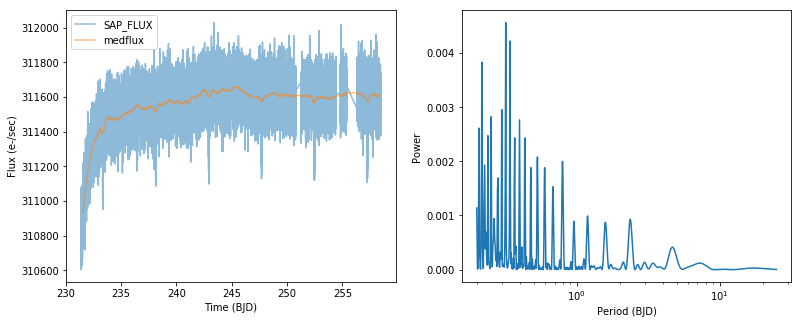

0.31905190519051907


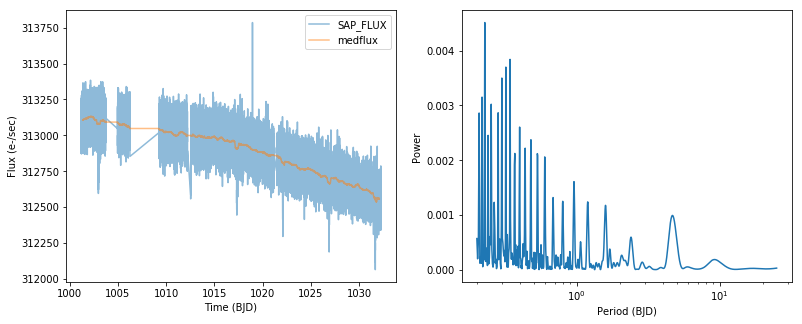

0.2272827282728273


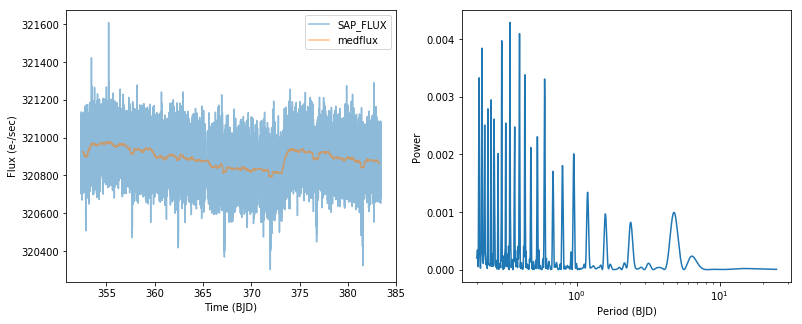

0.3413741374137414


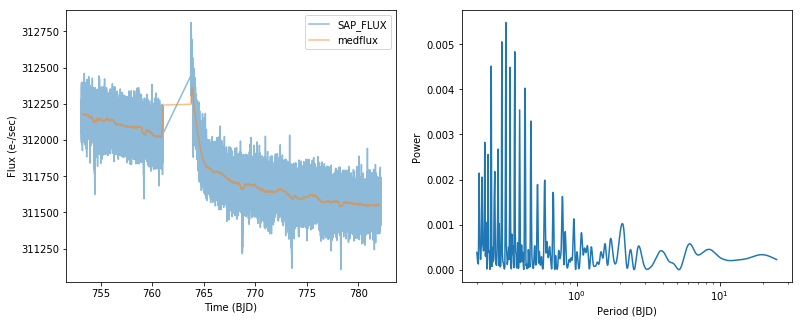

0.31905190519051907


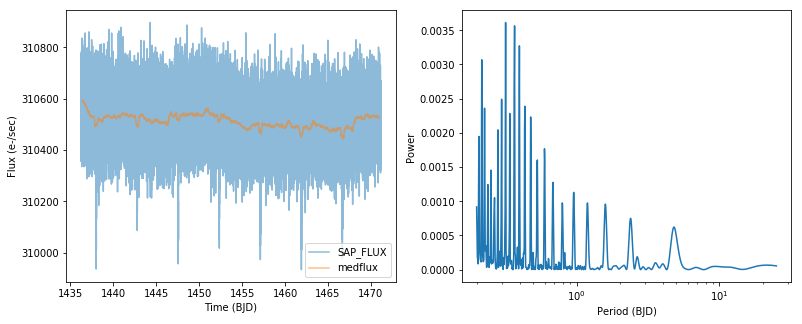

0.31905190519051907


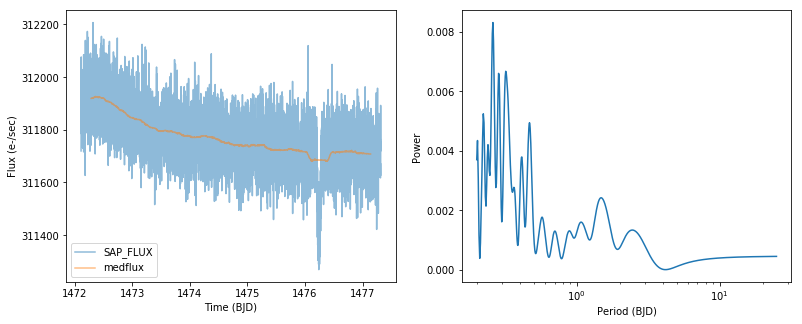

0.25952595259525957


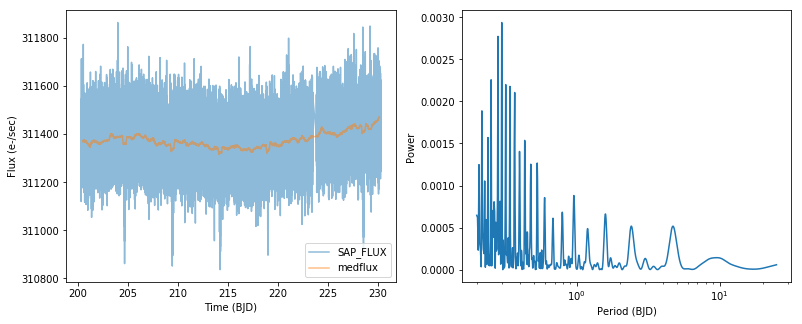

0.2992099209920992


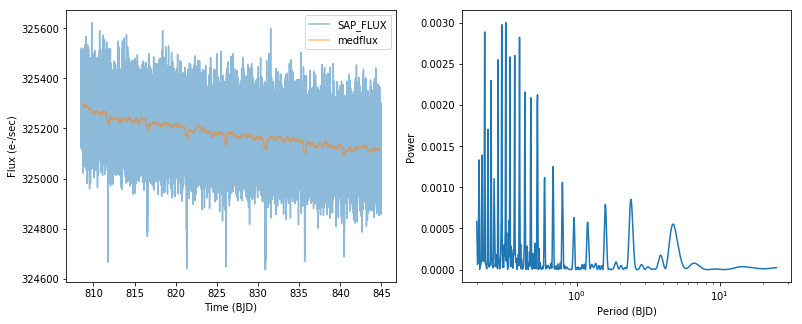

0.31905190519051907


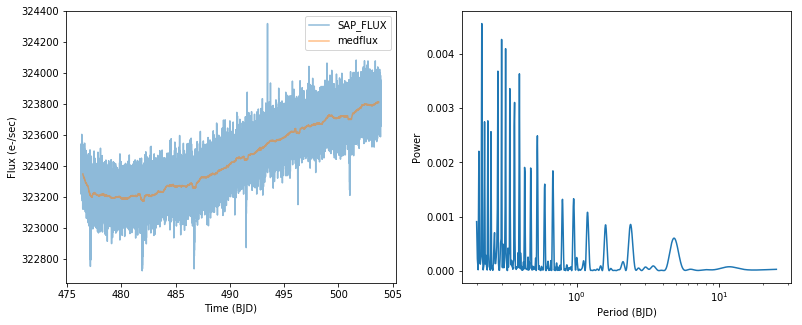

0.21736173617361737


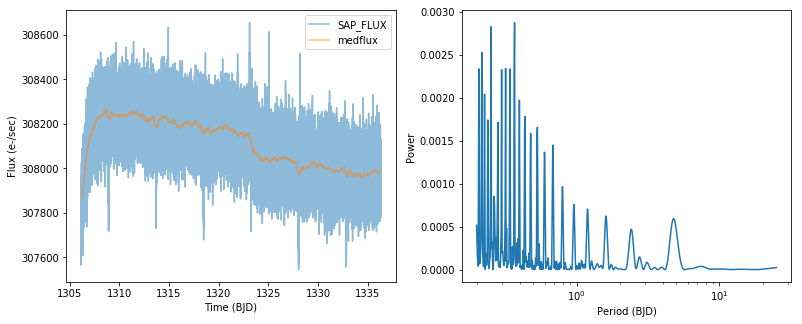

0.3686568656865687


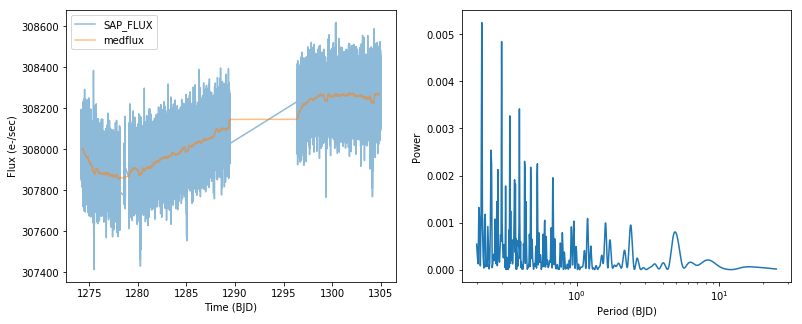

0.21736173617361737


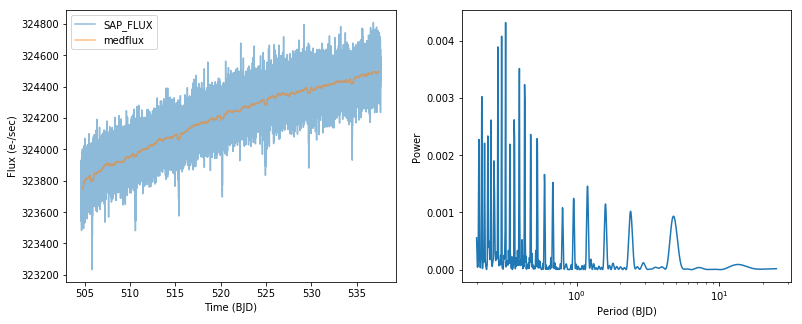

0.31905190519051907


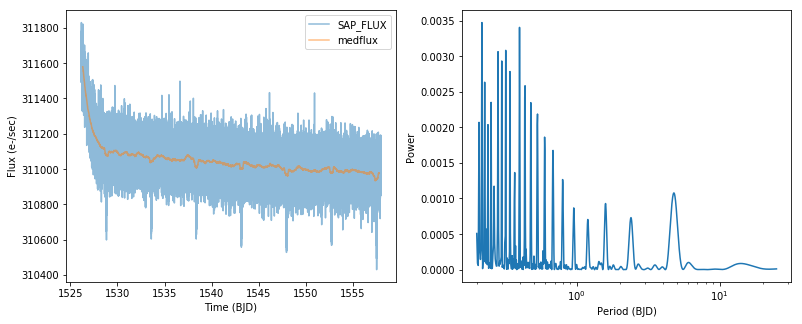

0.21736173617361737


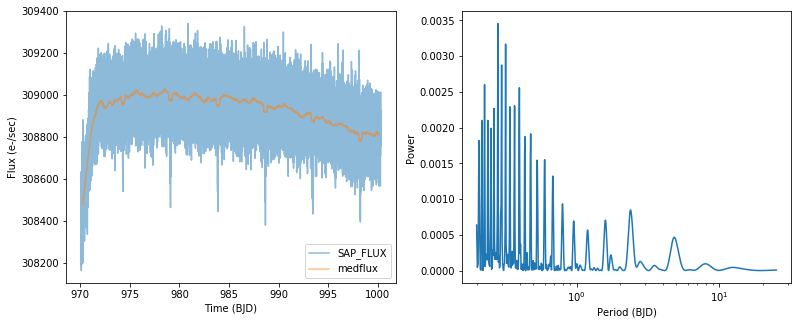

0.28184818481848184


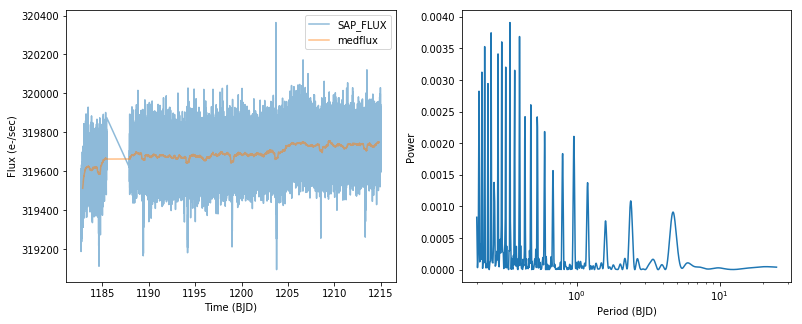

0.3413741374137414


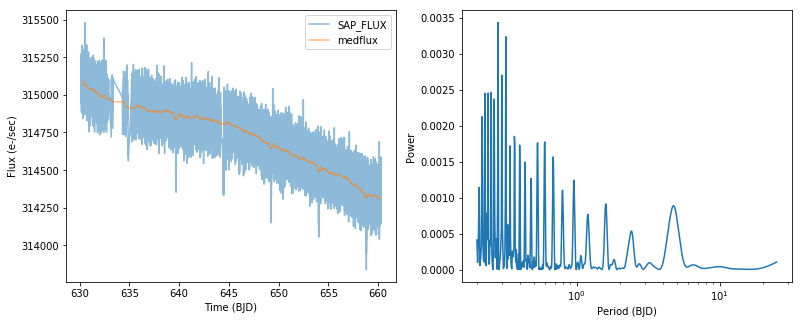

0.28184818481848184


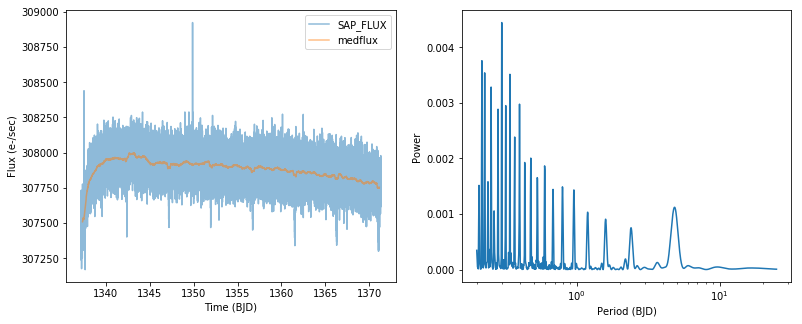

0.2992099209920992


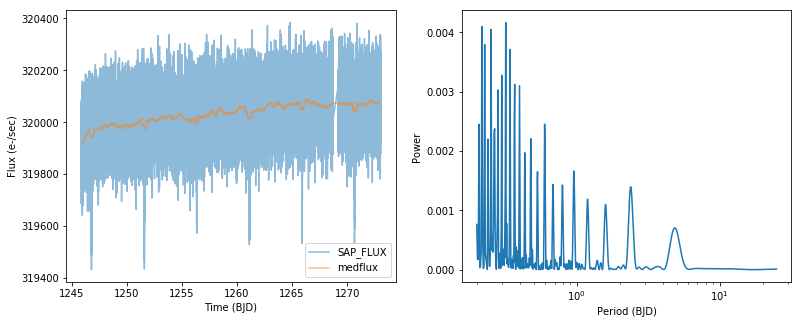

0.31905190519051907


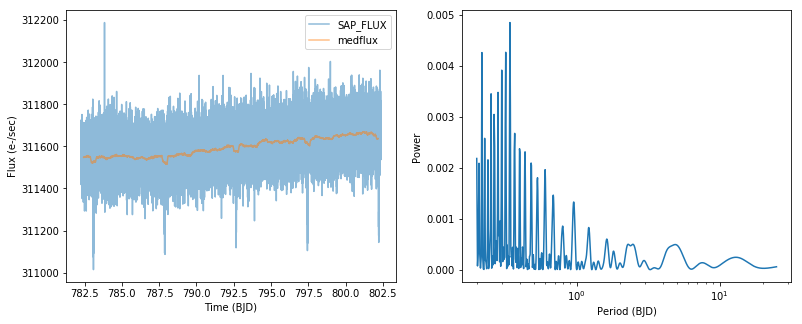

0.3413741374137414


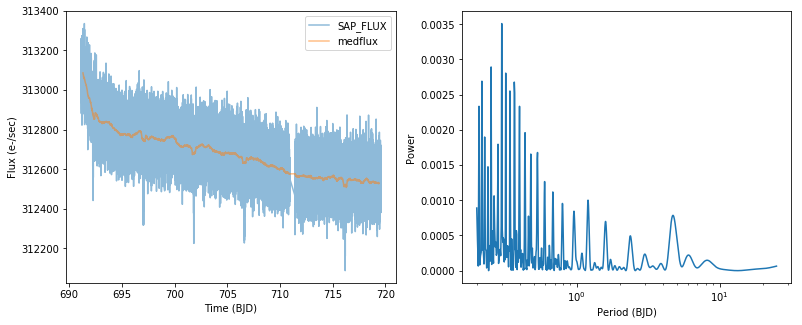

0.2992099209920992


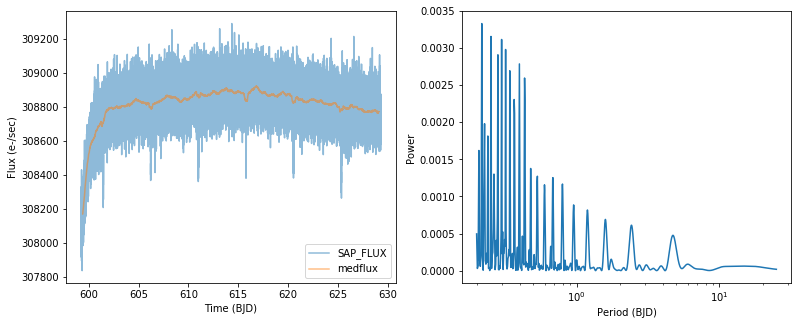

0.21736173617361737


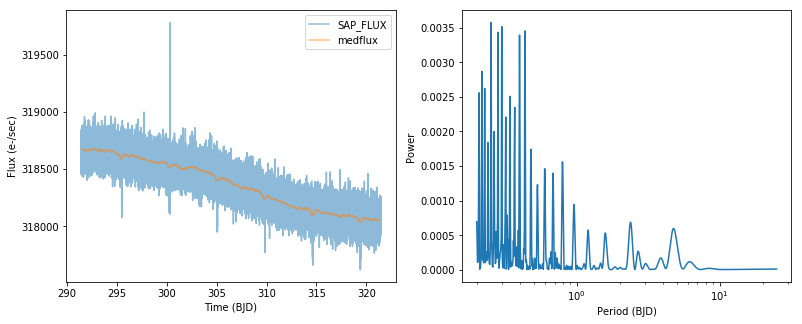

0.2520852085208521


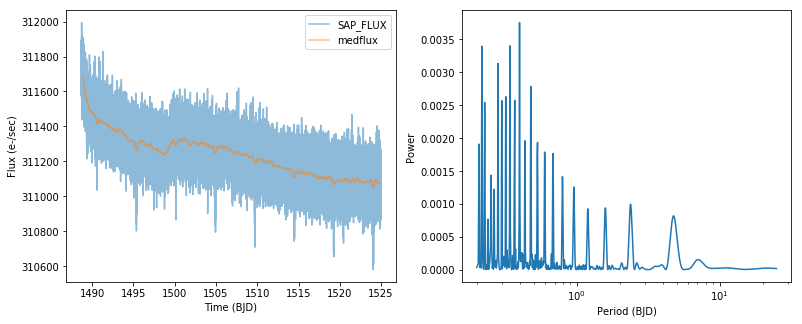

0.39841984198419844


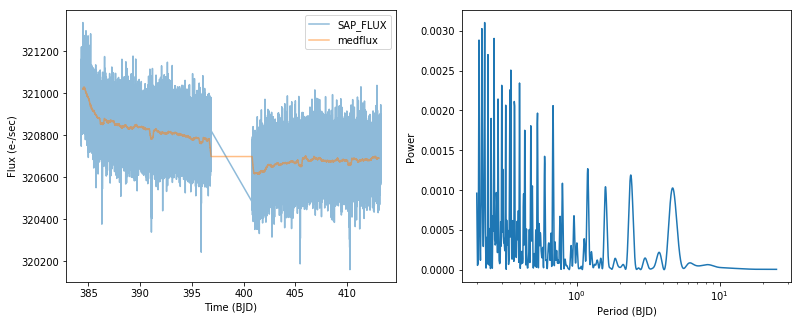

0.2272827282728273


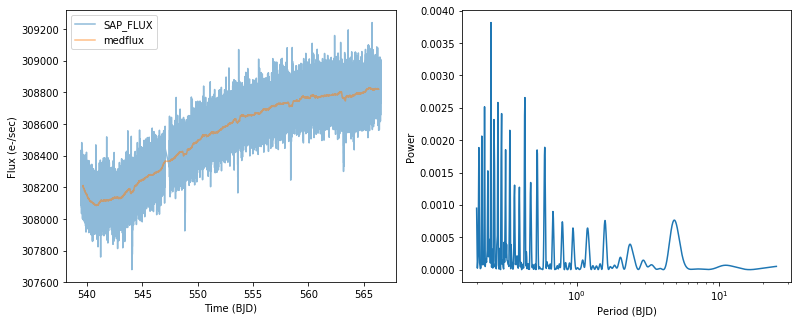

In [ ]:
stash = glob.glob('Candidate_2/*.fits')
best_periods = np.zeros(len(stash))
fap = np.zeros(len(stash))
for i in range(len(stash)):

    hdu = fits.open(stash[i])
    data = hdu[1].data
    ok = np.where((data['SAP_QUALITY'] == 0))

    medflux = pd.rolling_median(data['SAP_FLUX'][ok], 500, center=True)
    ok2 = np.isfinite(medflux)


    periods = np.linspace(.2, 25, 10000)
    model = LombScargle(data['TIME'][ok][ok2], data['SAP_FLUX'][ok][ok2]- medflux[ok2], data['SAP_FLUX_ERR'][ok][ok2])
    pwr = model.power(1/periods)

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(13,5)

    ax[0].plot(data['TIME'][ok], data['SAP_FLUX'][ok], alpha =.5, label= 'SAP_FLUX');
    ax[0].plot(data['TIME'][ok][ok2], medflux[ok2], alpha =.5, label= 'medflux');
    ax[0].set_xlabel("Time (BJD)");
    ax[0].set_ylabel("Flux (e-/sec)");
    ax[0].legend()

    ax[1].plot(periods, pwr);
    ax[1].set_xlabel("Period (BJD)");
    ax[1].set_ylabel("Power");
    ax[1].set_xscale('log')
    plt.text
    plt.savefig('pgram {0}.png'.format(i))
    plt.show()

    best_period = periods[np.argmax(pwr)]
    print(best_period)
    best_periods[i] = best_period

df = pd.DataFrame(data={'per':best_periods, 'Obj': stash})
df.to_csv(".csv")



In [3]:
df

Obj       per
0   Candidate_2/kplr008554498-2012060035710_slc.fits  0.299210
1   Candidate_2/kplr008554498-2011240104155_slc.fits  0.341374
2   Candidate_2/kplr008554498-2010078100744_slc.fits  0.217362
3   Candidate_2/kplr008554498-2011208035123_slc.fits  0.252085
4   Candidate_2/kplr008554498-2011024051157_slc.fits  0.299210
5   Candidate_2/kplr008554498-2012310112549_slc.fits  0.252085
6   Candidate_2/kplr008554498-2012341132017_slc.fits  0.341374
7   Candidate_2/kplr008554498-2009291181958_slc.fits  0.281848
8   Candidate_2/kplr008554498-2010111051353_slc.fits  0.227283
9   Candidate_2/kplr008554498-2010326094124_slc.fits  0.319052
10  Candidate_2/kplr008554498-2011145075126_slc.fits  0.319052
11  Candidate_2/kplr008554498-2009350160919_slc.fits  0.252085
12  Candidate_2/kplr008554498-2010234115140_slc.fits  0.217362
13  Candidate_2/kplr008554498-2012088054726_slc.fits  0.227283
14  Candidate_2/kplr008554498-2011334093404_slc.fits  0.319052
15  Candidate_2/kplr008554498-2011177032512_slc.fits  0.341374
16  Candidate_2/kplr008554498-2009201121230_slc.fits  0.299210
17  Candidate_2/kplr008554498-2012032013838_slc.fits  0.299210
18  Candidate_2/kplr008554498-2012004120508_slc.fits  0.281848
19  Candidate_2/kplr008554498-2009259162342_slc.fits  0.319052
20  Candidate_2/kplr008554498-2011303113607_slc.fits  0.227283
21  Candidate_2/kplr008554498-2010019161129_slc.fits  0.341374
22  Candidate_2/kplr008554498-2011053090032_slc.fits  0.319052
23  Candidate_2/kplr008554498-2013011073258_slc.fits  0.319052
24  Candidate_2/kplr008554498-2013017113907_slc.fits  0.259526
25  Candidate_2/kplr008554498-2009231120729_slc.fits  0.299210
26  Candidate_2/kplr008554498-2011116030358_slc.fits  0.319052
27  Candidate_2/kplr008554498-2010140023957_slc.fits  0.217362
28  Candidate_2/kplr008554498-2012242122129_slc.fits  0.368657
29  Candidate_2/kplr008554498-2012211050319_slc.fits  0.217362
30  Candidate_2/kplr008554498-2010174090439_slc.fits  0.319052
31  Candidate_2/kplr008554498-2013098041711_slc.fits  0.217362
32  Candidate_2/kplr008554498-2011271113734_slc.fits  0.281848
33  Candidate_2/kplr008554498-2012121044856_slc.fits  0.341374
34  Candidate_2/kplr008554498-2010296114515_slc.fits  0.281848
35  Candidate_2/kplr008554498-2012277125453_slc.fits  0.299210
36  Candidate_2/kplr008554498-2012179063303_slc.fits  0.319052
37  Candidate_2/kplr008554498-2011073133259_slc.fits  0.341374
38  Candidate_2/kplr008554498-2010355172524_slc.fits  0.299210
39  Candidate_2/kplr008554498-2010265121752_slc.fits  0.217362
40  Candidate_2/kplr008554498-2009322144938_slc.fits  0.252085
41  Candidate_2/kplr008554498-2013065031647_slc.fits  0.398420
42  Candidate_2/kplr008554498-2010049094358_slc.fits  0.227283
43  Candidate_2/kplr008554498-2010203174610_slc.fits  0.252085
44  Candidate_2/kplr008554498-2012151031540_slc.fits  0.319052

All the plots and tables for the first candidate

/Users/michaelpuig-holzman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


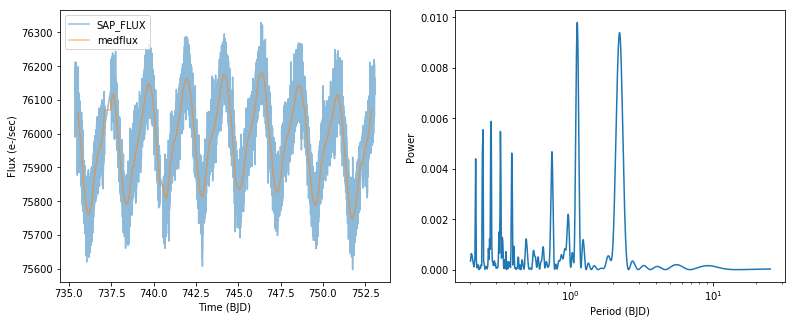

1.1176917691769177


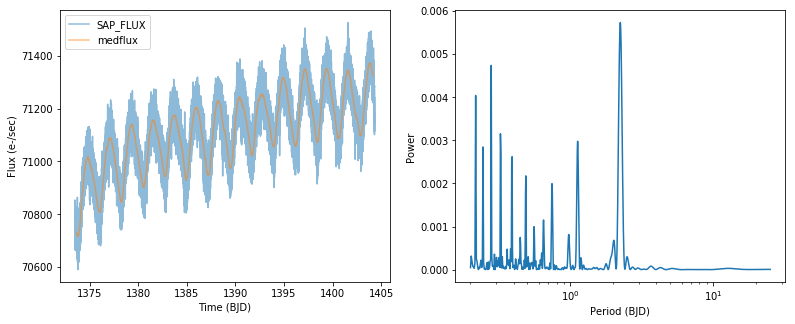

2.233803380338034


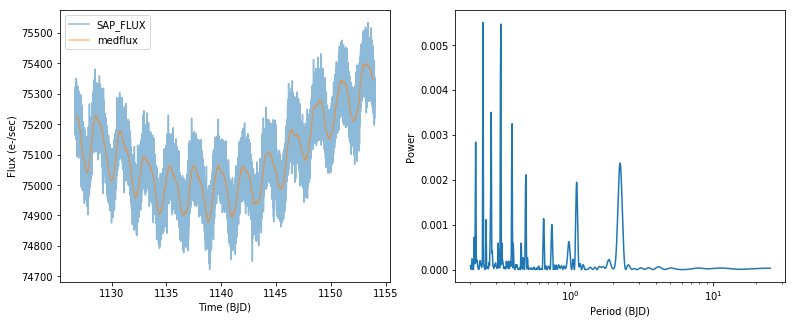

0.24464446444644466


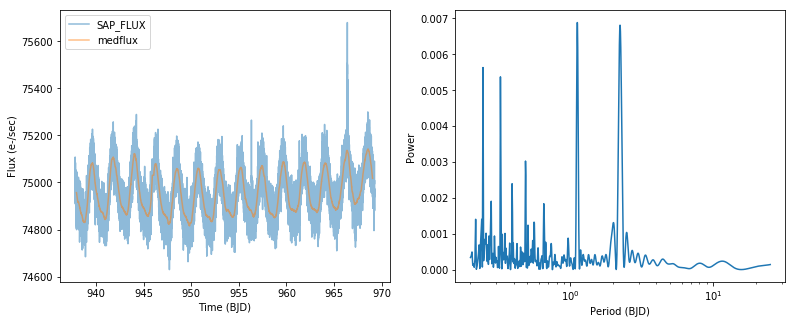

1.1176917691769177


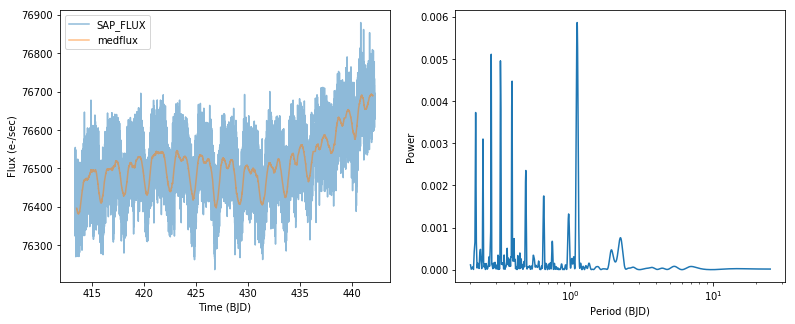

1.1152115211521152


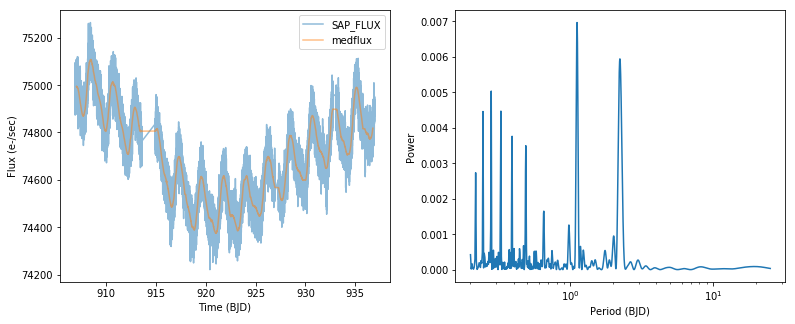

1.1127312731273127


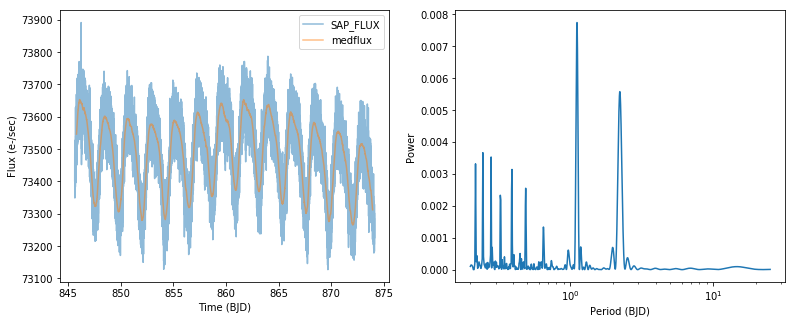

1.1127312731273127


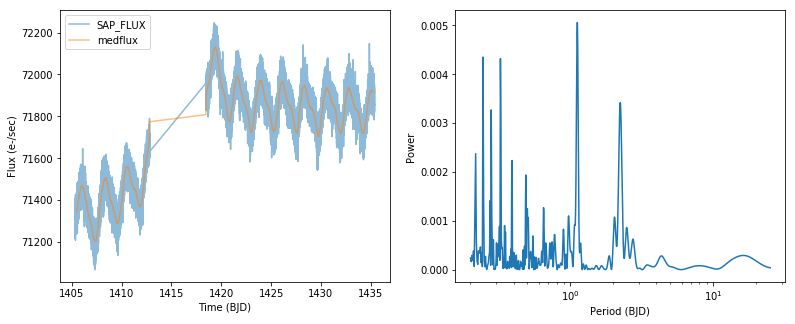

1.1176917691769177


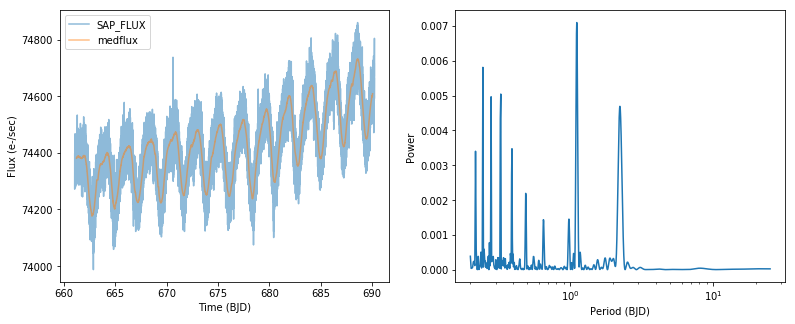

1.1102510251025104


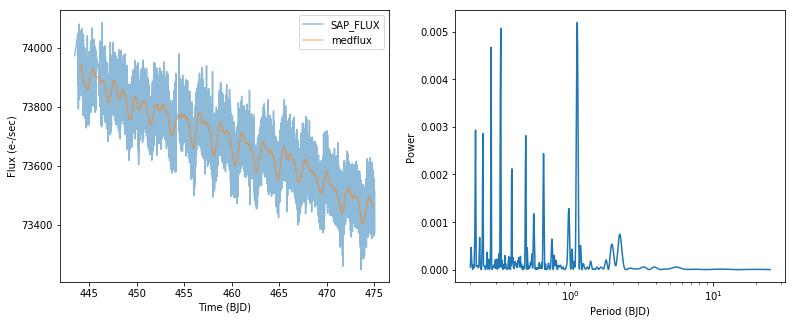

1.1176917691769177


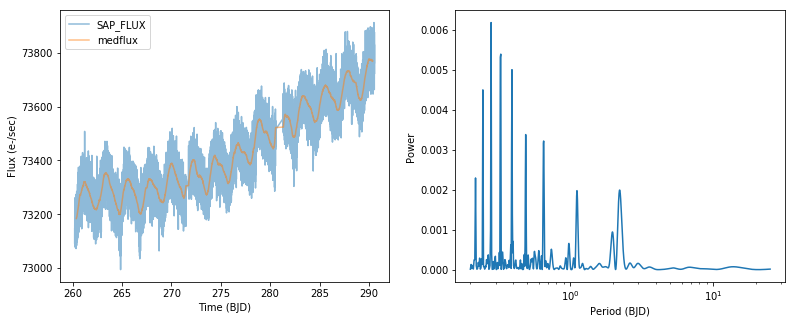

0.2793679367936794


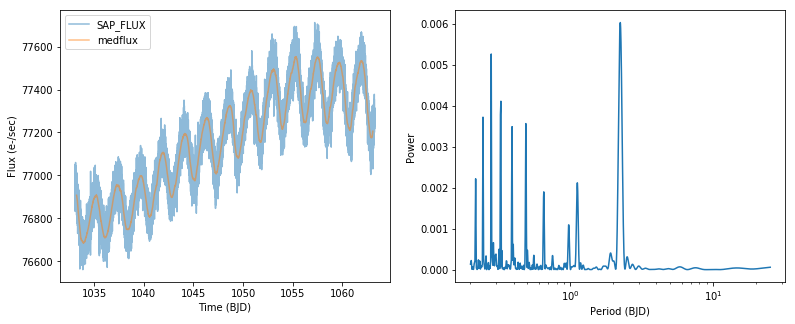

2.2313231323132316


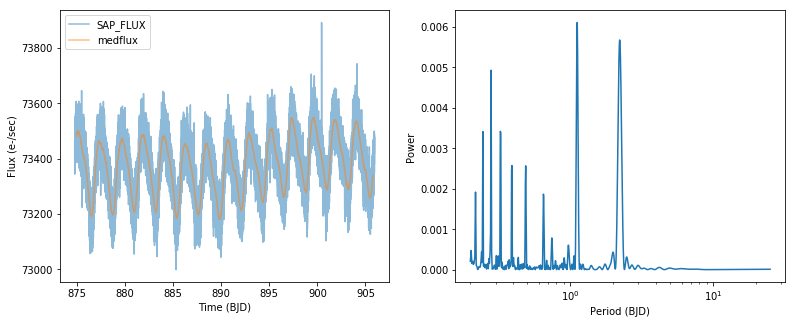

1.1176917691769177


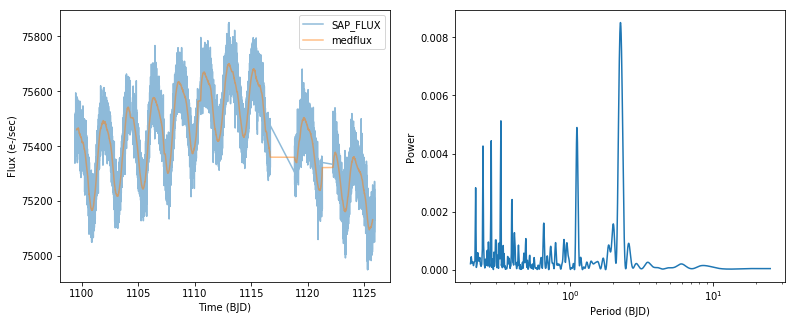

2.2412441244124417


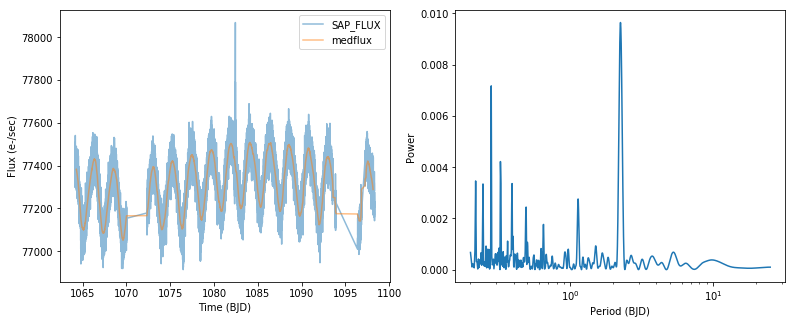

2.2412441244124417


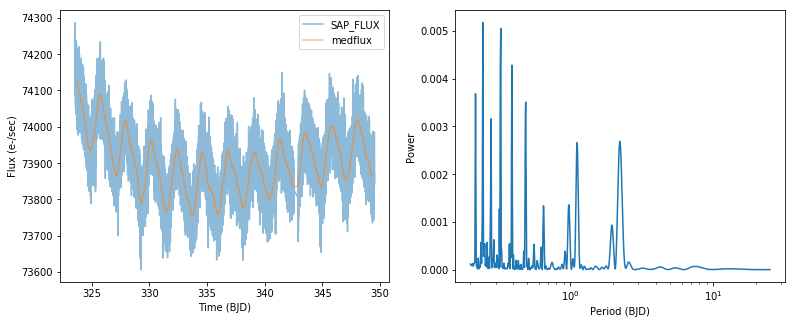

0.24464446444644466


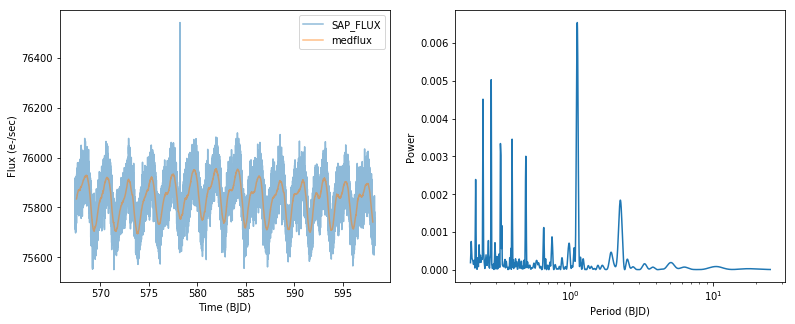

1.1152115211521152


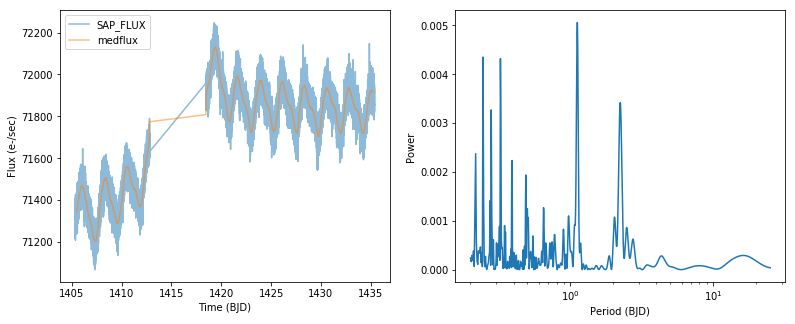

1.1176917691769177


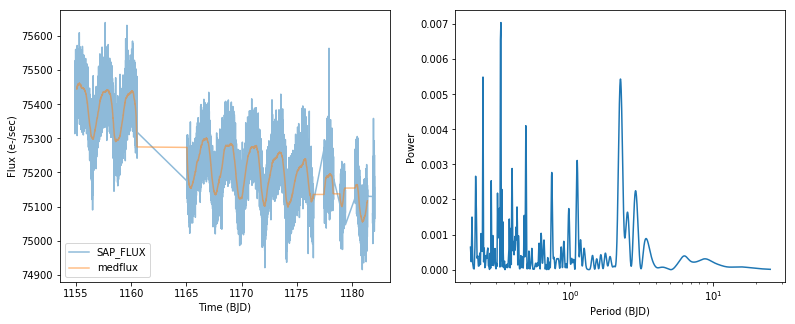

0.3264926492649265


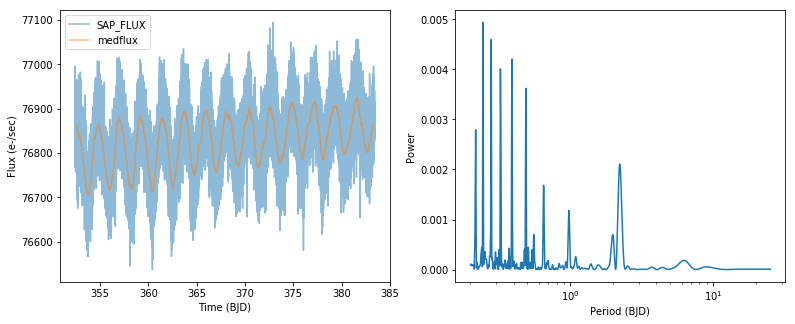

0.24464446444644466


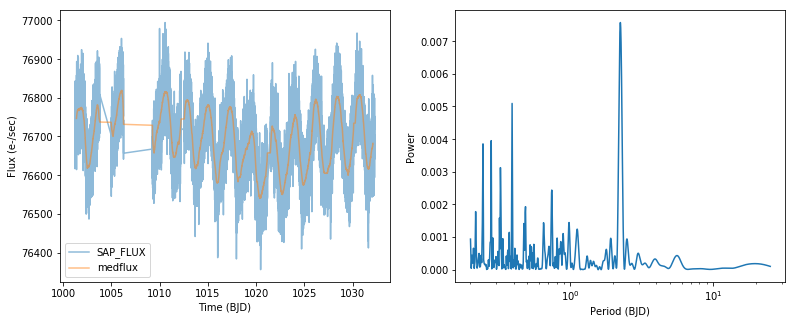

2.2362836283628367


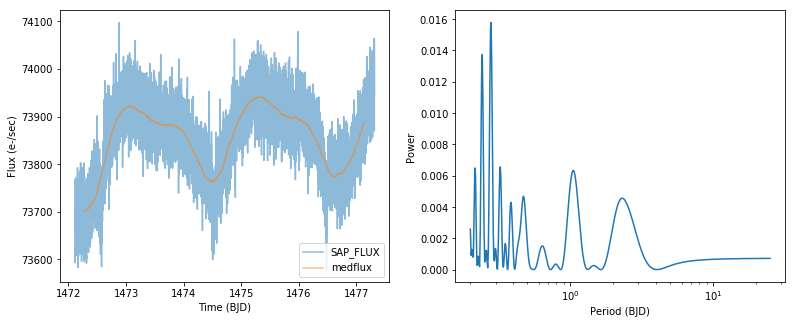

0.2793679367936794


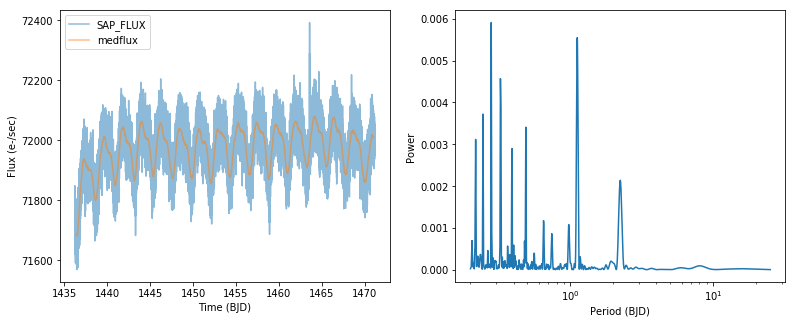

0.2793679367936794


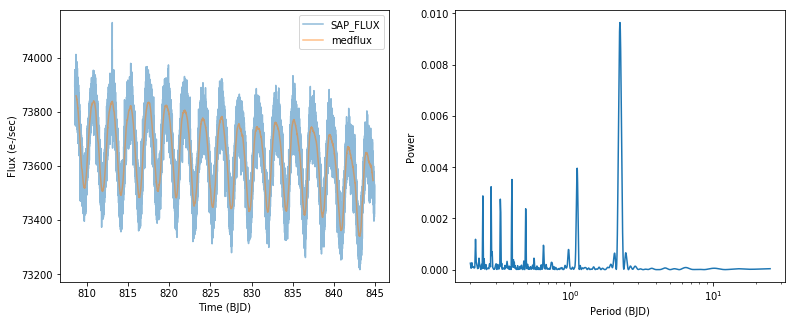

2.2263626362636266


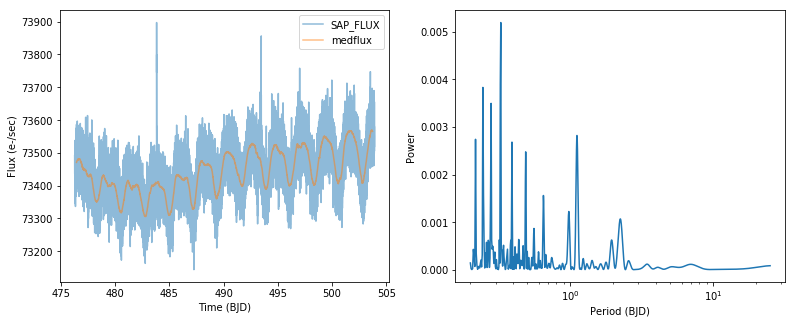

0.3264926492649265


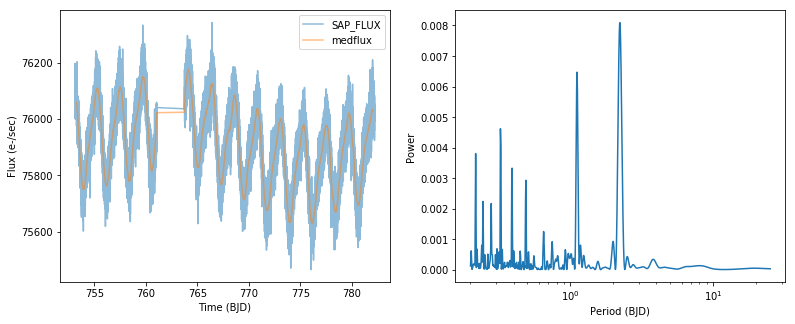

2.2164416441644166


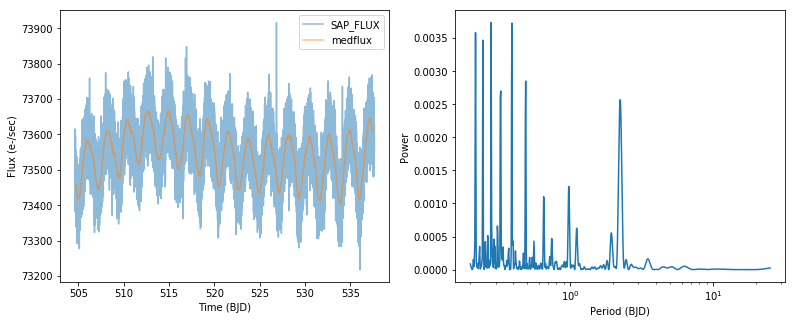

0.2793679367936794


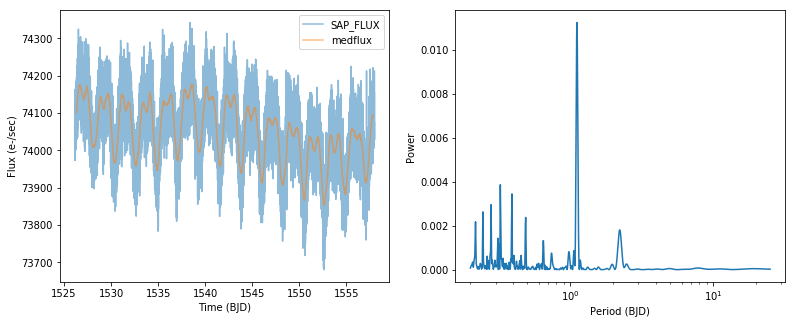

1.1127312731273127


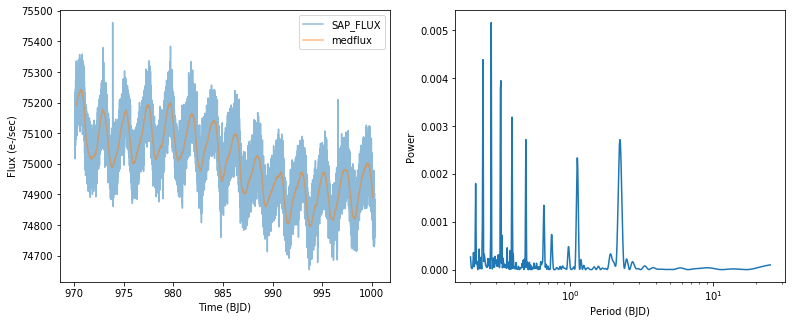

0.2793679367936794


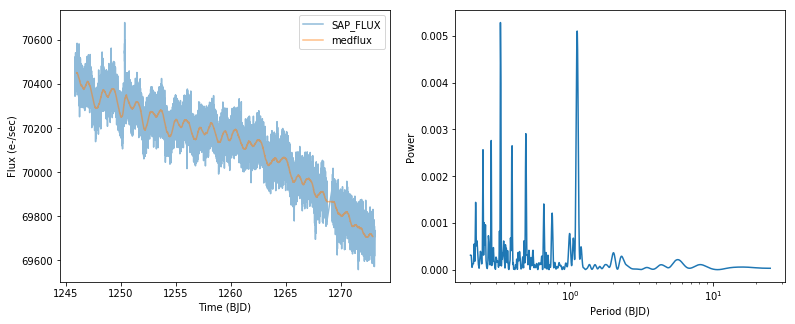

0.32401240124012404


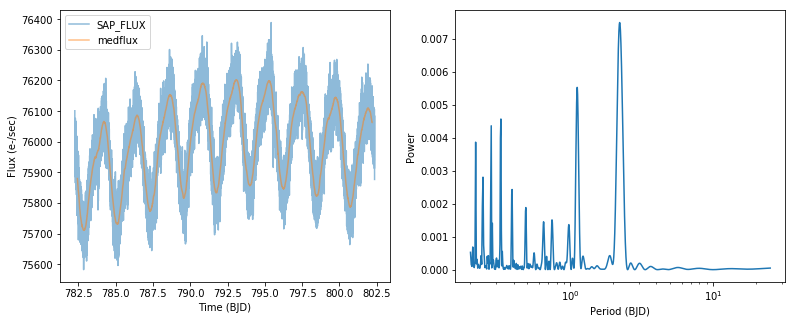

2.2114811481148116


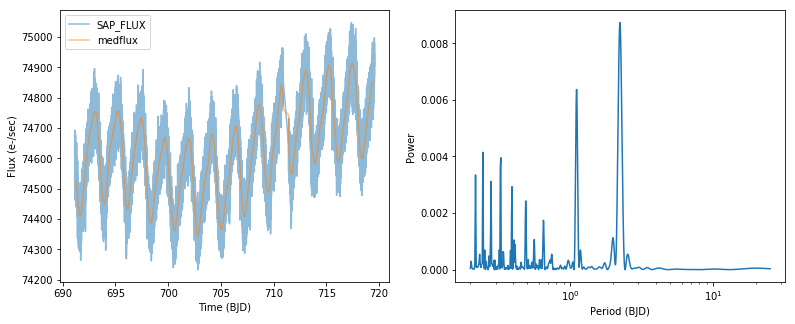

2.2238823882388243


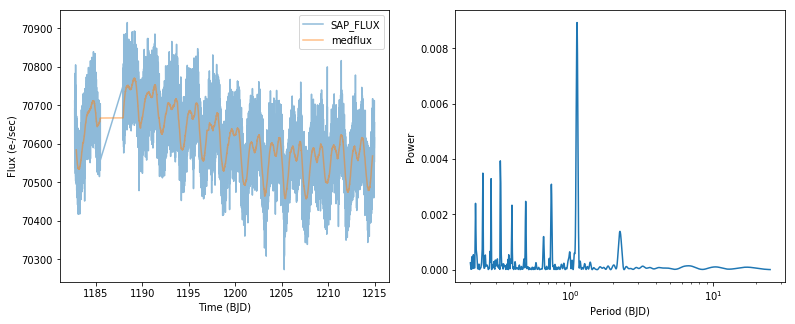

1.1152115211521152


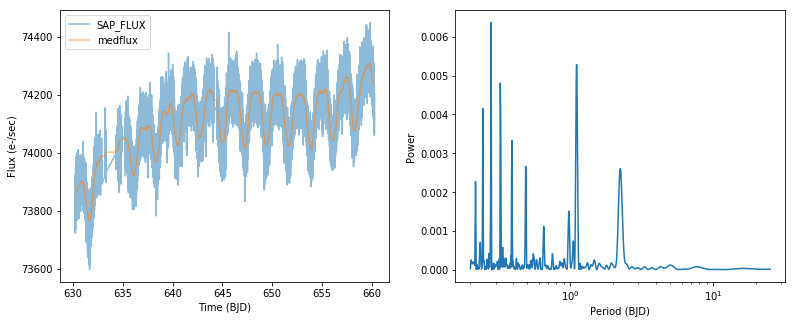

0.2793679367936794


In [ ]:
stash1 = glob.glob('Candidate_1/*.fits')
best_periods = np.zeros(len(stash1))
fap = np.zeros(len(stash1))
for i in range(len(stash1)):

    hdu = fits.open(stash1[i])
    data = hdu[1].data
    ok = np.where((data['SAP_QUALITY'] == 0))

    medflux = pd.rolling_median(data['SAP_FLUX'][ok], 500, center=True)
    ok2 = np.isfinite(medflux)


    periods = np.linspace(.2, 25, 10000)
    model = LombScargle(data['TIME'][ok][ok2], data['SAP_FLUX'][ok][ok2]- medflux[ok2], data['SAP_FLUX_ERR'][ok][ok2])
    pwr = model.power(1/periods)

    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(13,5)

    ax[0].plot(data['TIME'][ok], data['SAP_FLUX'][ok], alpha =.5, label= 'SAP_FLUX');
    ax[0].plot(data['TIME'][ok][ok2], medflux[ok2], alpha =.5, label= 'medflux');
    ax[0].set_xlabel("Time (BJD)");
    ax[0].set_ylabel("Flux (e-/sec)");
    #ax[0].xlim()
    ax[0].legend()

    ax[1].plot(periods, pwr);
    ax[1].set_xlabel("Period (BJD)");
    ax[1].set_ylabel("Power");
    ax[1].set_xscale('log')
    plt.text
    plt.savefig('pgram {0}.png'.format(i))
    plt.show()

    best_period = periods[np.argmax(pwr)]
    print(best_period)
    best_periods[i] = best_period

df1 = pd.DataFrame(data={'per':best_periods, 'Obj': stash})
df1.to_csv(".csv")

In [ ]:
df1